## Let's visualize the images

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:

def create_alexnet_model(input_shape=(227, 227, 3), num_classes=2):
    model = Sequential([
        # 1st Convolutional Layer
        Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=input_shape),
        MaxPooling2D((3, 3), strides=2),

        # 2nd Convolutional Layer
        Conv2D(256, (5, 5), padding='same', activation='relu'),
        MaxPooling2D((3, 3), strides=2),

        # 3rd, 4th, 5th Convolutional Layers
        Conv2D(384, (3, 3), padding='same', activation='relu'),
        Conv2D(384, (3, 3), padding='same', activation='relu'),
        Conv2D(256, (3, 3), padding='same', activation='relu'),
        MaxPooling2D((3, 3), strides=2),

        # Flatten Layer
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

alexnetModel = create_alexnet_model()


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 32

# this is the augmentation configuration we will use for training
#here along with rescaling, we are also changing the orientation of the image in only training dataset, 
#this is we are doing so that our model never sees the same image, and this will help in fighting overfitting.
train_datagen_8K = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing, validation, visualization:
# only rescaling
test_datagen_8K = ImageDataGenerator(rescale=1./255)
validation_datagen_8K = ImageDataGenerator(rescale=1./255)
visualization_datagen_8K = ImageDataGenerator(rescale=1./255)


# this is a generator that will read pictures found in
# subfolers of 'master_data/train', and indefinitely generate
# batches of augmented image data
train_generator_8K = train_datagen_8K.flow_from_directory(
        'data_8k/train',  # this is the target directory
        target_size=(227, 227),  # all images will be resized to 227*227
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for test data
test_generator_8K = test_datagen_8K.flow_from_directory(
        'data_8k/test',
        target_size=(227, 227),
        batch_size=batch_size,
        class_mode='binary')

# this is a similar generator, for validation data
validation_generator_8K = validation_datagen_8K.flow_from_directory(
        'data_8k/validation',
        target_size=(227, 227),
        batch_size=batch_size,
        class_mode='binary')

# this is a similar generator, for visualization data
visualization_generator_8K = visualization_datagen_8K.flow_from_directory(
        'data_8k/visualization',
        target_size=(227, 227),
        batch_size=batch_size,
        class_mode='binary')

Found 1845 images belonging to 2 classes.
Found 319 images belonging to 2 classes.
Found 288 images belonging to 2 classes.
Found 39 images belonging to 2 classes.


In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from keras.metrics import Precision, Recall

In [4]:
# Define AlexNet Model
alexnetModel = Sequential()

alexnetModel.add(Conv2D(96, (11, 11), strides=(4, 4), padding='valid', input_shape=(227, 227, 3)))
alexnetModel.add(Activation('relu'))
alexnetModel.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

alexnetModel.add(Conv2D(256, (5, 5), padding='same'))
alexnetModel.add(Activation('relu'))
alexnetModel.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

alexnetModel.add(Conv2D(384, (3, 3), padding='same'))
alexnetModel.add(Activation('relu'))
alexnetModel.add(Conv2D(384, (3, 3), padding='same'))
alexnetModel.add(Activation('relu'))
alexnetModel.add(Conv2D(256, (3, 3), padding='same'))
alexnetModel.add(Activation('relu'))
alexnetModel.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

alexnetModel.add(Flatten())
alexnetModel.add(Dense(4096))
alexnetModel.add(Activation('relu'))
alexnetModel.add(Dropout(0.5))
alexnetModel.add(Dense(4096))
alexnetModel.add(Activation('relu'))
alexnetModel.add(Dropout(0.5))
alexnetModel.add(Dense(1))
alexnetModel.add(Activation('sigmoid'))

In [13]:
# Data Augmentation
data_gen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_gen = ImageDataGenerator(rescale=1./255)

train_generator = data_gen.flow_from_directory('data_8k/train', target_size=(227, 227), batch_size=batch_size, class_mode='binary')
val_generator = test_gen.flow_from_directory('data_8k/validation', target_size=(227, 227), batch_size=batch_size, class_mode='binary')
test_generator = test_gen.flow_from_directory('data_8k/test', target_size=(227, 227), batch_size=batch_size, class_mode='binary')

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', patience=4, min_delta=0.01)


Found 1845 images belonging to 2 classes.
Found 288 images belonging to 2 classes.
Found 319 images belonging to 2 classes.


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import time

# Define AlexNet Model
alexnetModel = Sequential()

alexnetModel.add(Conv2D(96, (11, 11), strides=(4, 4), padding='valid', input_shape=(227, 227, 3)))
alexnetModel.add(Activation('relu'))
alexnetModel.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

alexnetModel.add(Conv2D(256, (5, 5), padding='same'))
alexnetModel.add(Activation('relu'))
alexnetModel.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

alexnetModel.add(Conv2D(384, (3, 3), padding='same'))
alexnetModel.add(Activation('relu'))
alexnetModel.add(Conv2D(384, (3, 3), padding='same'))
alexnetModel.add(Activation('relu'))
alexnetModel.add(Conv2D(256, (3, 3), padding='same'))
alexnetModel.add(Activation('relu'))
alexnetModel.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

alexnetModel.add(Flatten())
alexnetModel.add(Dense(4096))
alexnetModel.add(Activation('relu'))
alexnetModel.add(Dropout(0.5))
alexnetModel.add(Dense(4096))
alexnetModel.add(Activation('relu'))
alexnetModel.add(Dropout(0.5))
alexnetModel.add(Dense(1))
alexnetModel.add(Activation('sigmoid'))
alexnetModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall()])
alexnetModel.summary()
alexnetModel.save_weights("alexnetModelWeights.weights.h5")

batch_size = 32
# Data Augmentation
data_gen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_gen = ImageDataGenerator(rescale=1./255)

train_generator = data_gen.flow_from_directory('data_8k/train', target_size=(227, 227), batch_size=batch_size, class_mode='binary')
val_generator = test_gen.flow_from_directory('data_8k/validation', target_size=(227, 227), batch_size=batch_size, class_mode='binary')
test_generator = test_gen.flow_from_directory('data_8k/test', target_size=(227, 227), batch_size=batch_size, class_mode='binary')

es = EarlyStopping(monitor='val_accuracy', patience=4, min_delta=0.01)

start_time = time.time()
alexnetModel.fit(train_generator, epochs=10, validation_data=val_generator, callbacks=[es])
finish_time = time.time()

time_taken = finish_time - start_time
print('\n')
print('Training complete in {:.0f}m {:.0f}s'.format(time_taken // 60, time_taken % 60))

test_loss, accuracy, precision, recall = alexnetModel.evaluate(test_generator)
print(' Accuracy : ', accuracy, '\n', 'Precision : ', precision, '\n', 'Recall : ', recall)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 55, 55, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 27, 27, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 13, 13, 384)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 13, 13, 384)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │           4,097 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 58,285,441 (222.34 MB)

 Trainable params: 58,285,441 (222.34 MB)

 Non-trainable params: 0 (0.00 B)

Found 1845 images belonging to 2 classes.
Found 288 images belonging to 2 classes.
Found 319 images belonging to 2 classes.
Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.5047 - loss: 0.9983 - precision_1: 0.4765 - recall_1: 0.4851 - val_accuracy: 0.7292 - val_loss: 0.6140 - val_precision_1: 0.7597 - val_recall_1: 0.6759
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.7325 - loss: 0.6027 - precision_1: 0.6883 - recall_1: 0.8259 - val_accuracy: 0.7292 - val_loss: 0.5528 - val_precision_1: 0.6558 - val_recall_1: 0.9724
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.6510 - loss: 0.5820 - precision_1: 0.6134 - recall_1: 0.6439 - val_accuracy: 0.7153 - val_loss: 0.5572 - val_precision_1: 0.6413 - val_recall_1: 0.9862
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.7804 - loss: 0.4978 - precision_1: 0.7061 - recall_1: 0.9372 - val_accuracy: 0.8507 - val_loss: 0.3984 - val_precision_1: 0.8400 - val_recall_1: 0.8690
Epoch 5/10


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

def AlexNet_segmentation(input_shape=(256, 256, 3)):
    inputs = tf.keras.Input(shape=input_shape)

    # Feature Extraction (Original AlexNet Convolutions)
    x = layers.Conv2D(96, (11, 11), strides=4, activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=2)(x)

    x = layers.Conv2D(256, (5, 5), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((3, 3), strides=2)(x)

    x = layers.Conv2D(384, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(384, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((3, 3), strides=2)(x)

    # Decoder (Upsampling for Segmentation)
    x = layers.Conv2DTranspose(256, (3, 3), strides=2, activation='relu', padding='same')(x)
    x = layers.Conv2DTranspose(128, (3, 3), strides=2, activation='relu', padding='same')(x)
    x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding='same')(x)
    
    # Output segmentation mask
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create Model
input_shape = (256, 256, 3)
model = AlexNet_segmentation(input_shape)


### VISUALISING PREDICTIONS OF ALEXNET MODEL TRAINED ON 8K IMAGES

In [17]:
imgarr_8K = visualization_generator_8K[0][0]
imgarr_8K.shape


(32, 227, 227, 3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


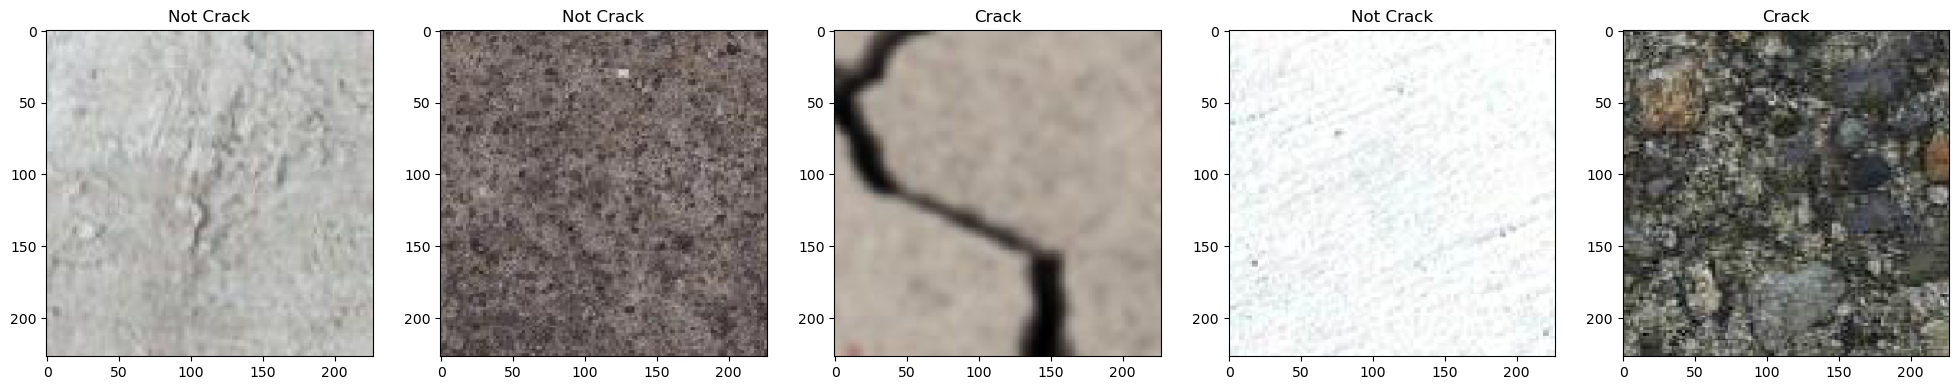

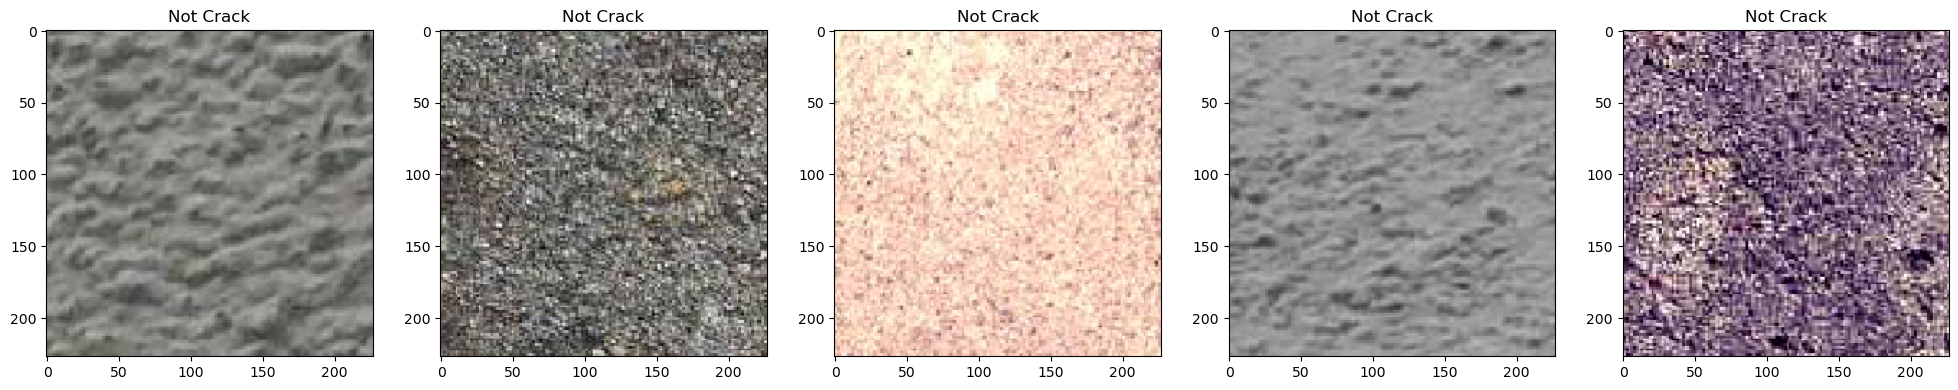

In [20]:
import numpy as np
import matplotlib.pyplot as plt


predictions = alexnetModel.predict(imgarr_8K)
pred_class_arr = np.array(predictions).round()
counter = 0
for i in range(2):
    fig = plt.figure(figsize=(50, 50))
    for j in range(5):
        axisarr = fig.add_subplot(10, 10, j+1)
        axisarr.imshow(imgarr_8K[counter])
        if(pred_class_arr[counter] == 0):
            axisarr.set_title('Crack')
        else:
            axisarr.set_title('Not Crack')
        counter += 1

In [21]:
random_image_path = "C:/Users/USER/Desktop/CRACK_DETECTION/istockphoto-1080117220-612x612.jpg"

In [22]:
def highlight_cracks(im, model):
    output_image = np.zeros_like(im)
    a = 0
    for i in range(12):
        k = 0
        for j in range(12):
            p = im[a:a+100, k:k+100]
            resizeIm = cv2.resize(p, (227, 227))
            im_arr = np.zeros((1, 227, 227, 3))
            im_arr[0] = resizeIm
            pred = model.predict(im_arr)
            prediction = np.array(pred).round()
            if(prediction == 0):
                color = (255, 26, 26)
            else:
                color = (153, 255, 153)
            b = np.zeros_like(p, dtype=np.uint8)
            b[:] = color
            add_img = cv2.addWeighted(p, 0.83, b, 0.17, 0)
            output_image[a:a+100, k:k+100] = add_img
            k += 100
        a += 100
    return output_image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

Text(0.5, 1.0, 'Raw Image')

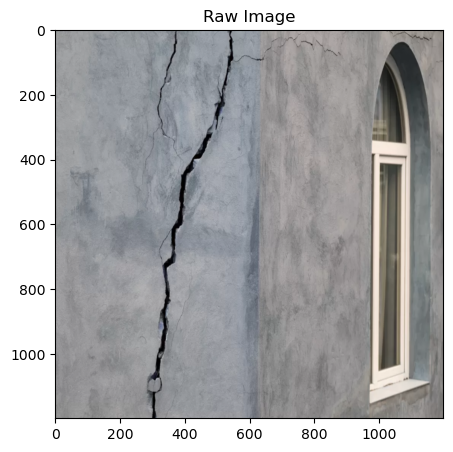

In [27]:
import cv2
import matplotlib.pyplot as plt

im = cv2.imread(random_image_path)
im = cv2.resize(im, (1200, 1200))
crack_highlighted_image = highlight_cracks(im, alexnetModel)
fig = plt.figure(figsize=(120, 120))
axisarr = fig.add_subplot(20, 20, 1)
axisarr.imshow(im)
axisarr.set_title('Raw Image')



Text(0.5, 1.0, 'Crack Highlighted Image')

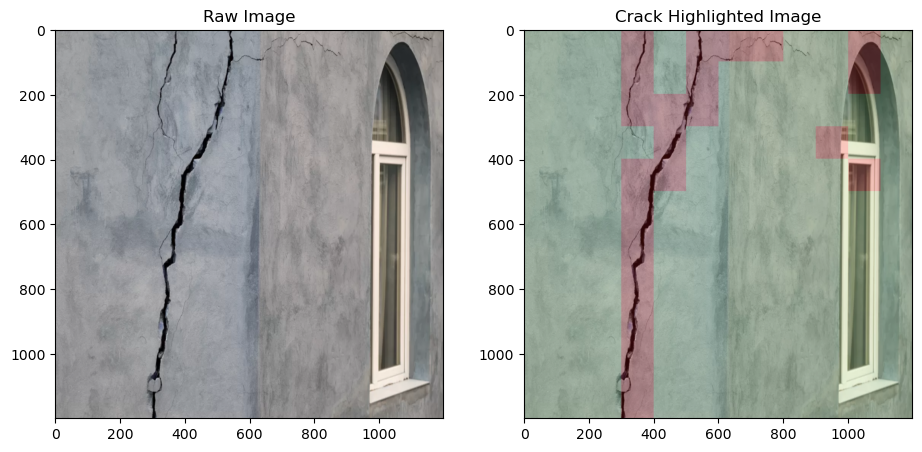

In [31]:
fig = plt.figure(figsize=(120, 120))
axisarr = fig.add_subplot(20, 20, 1)
axisarr.imshow(im)
axisarr.set_title('Raw Image')

axisarr = fig.add_subplot(20, 20, 2)
axisarr.imshow(crack_highlighted_image)
axisarr.set_title('Crack Highlighted Image')

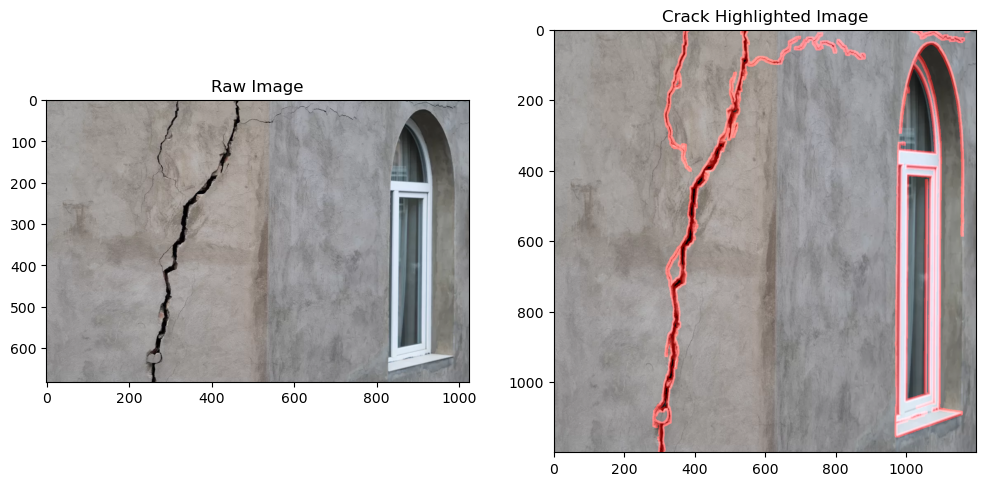

In [32]:
import cv2
import matplotlib.pyplot as plt

def highlight_cracks(image_path):

    im = cv2.imread(image_path)
    if im is None:
        print(f"Error: Could not read image at path: {image_path}")
        return None

    im = cv2.resize(im, (1200, 1200))

    # Convert to grayscale
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use Canny edge detection to find edges
    edges = cv2.Canny(blurred, 50, 150)

    # Dilate the edges to make cracks more visible
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    dilated_edges = cv2.dilate(edges, kernel, iterations=2)

    # Create a mask from the dilated edges
    mask = dilated_edges

    # Invert the mask (cracks will be white)
    mask_inv = cv2.bitwise_not(mask)

    # Create a red overlay for the cracks
    red_overlay = im.copy()
    red_overlay[:] = (0, 0, 255)  # BGR for red

    # Use the mask to color the crack regions red in the original image
    highlighted_image = cv2.bitwise_and(red_overlay, red_overlay, mask=mask)
    highlighted_image = cv2.addWeighted(im, 1, highlighted_image, 0.5, 0)

    return highlighted_image

# Path to your image file
image_path = "C:/Users/USER/Desktop/CRACK_DETECTION/istockphoto-1080117220-612x612.jpg"  # Replace with the actual path to your image

# Highlight the cracks
crack_highlighted_image = highlight_cracks(image_path)

if crack_highlighted_image is not None:
    # Display the original and highlighted images
    fig = plt.figure(figsize=(12, 12))

    axisarr = fig.add_subplot(1, 2, 1)
    axisarr.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    axisarr.set_title('Raw Image')

    axisarr = fig.add_subplot(1, 2, 2)
    axisarr.imshow(cv2.cvtColor(crack_highlighted_image, cv2.COLOR_BGR2RGB))
    axisarr.set_title('Crack Highlighted Image')

    plt.show()

In [33]:
random_image_path2 = "C:/Users/USER/Desktop/CRACK_DETECTION/istockphoto-1080117220-612x612_2.jpg"

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

Text(0.5, 1.0, 'Raw Image')

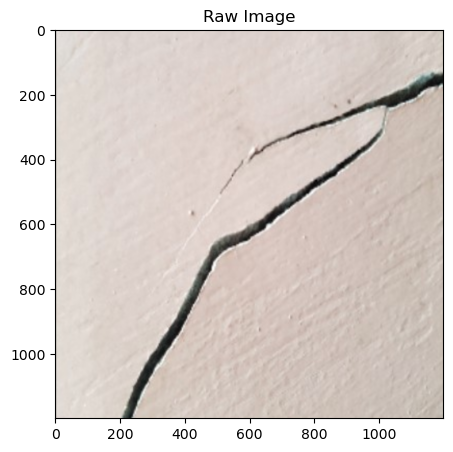

In [37]:
import cv2
import matplotlib.pyplot as plt

im = cv2.imread(random_image_path2)
im = cv2.resize(im, (1200, 1200))
crack_highlighted_image = highlight_cracks(im, alexnetModel)
fig = plt.figure(figsize=(120, 120))
axisarr = fig.add_subplot(20, 20, 1)
axisarr.imshow(im)
axisarr.set_title('Raw Image')



Text(0.5, 1.0, 'Crack Highlighted Image')

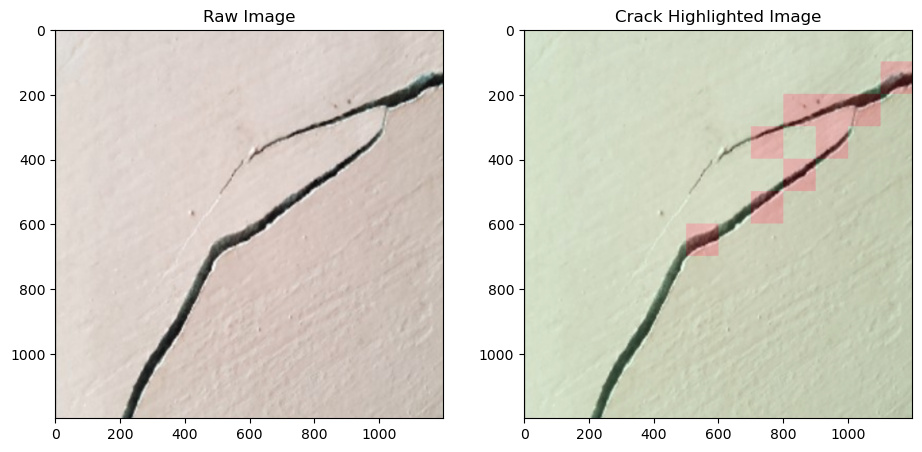

In [38]:
fig = plt.figure(figsize=(120, 120))
axisarr = fig.add_subplot(20, 20, 1)
axisarr.imshow(im)
axisarr.set_title('Raw Image')

axisarr = fig.add_subplot(20, 20, 2)
axisarr.imshow(crack_highlighted_image)
axisarr.set_title('Crack Highlighted Image')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-116.68..142.061].


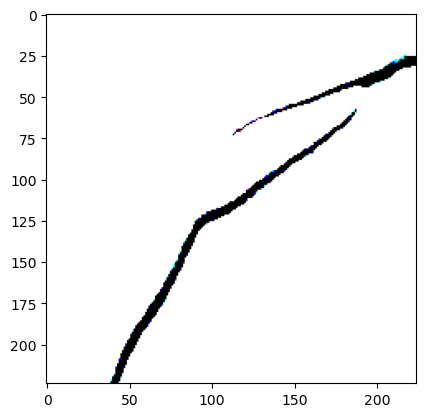

In [45]:
import cv2
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt

# Load the image
random_image_path2 = "C:/Users/USER/Desktop/CRACK_DETECTION/istockphoto-1080117220-612x612_2.jpg"
image = cv2.imread(random_image_path2)

# Resize the image to 224x224, which is the required input size for VGG16
image_resized = cv2.resize(image, (224, 224))

# Convert image to float32 (this is important for the preprocessing step)
image_resized = image_resized.astype('float32')

# Preprocess the image (this will normalize it as per VGG16's preprocessing requirements)
image_resized = preprocess_input(image_resized)

# Add an extra batch dimension
image_resized = np.expand_dims(image_resized, axis=0)

# At this point, image_resized is ready to be passed into a model like VGG16

# If you want to see the image
plt.imshow(cv2.cvtColor(image_resized[0], cv2.COLOR_BGR2RGB))
plt.show()
